# Python機器學習與深度學習入門 
## Question ：使用Functional API建構NN，並加入分叉
## by R07522717 林温雅

`Package`

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Keras functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Keras dataset
from keras.datasets import mnist
# Keras utils
from keras.utils import np_utils
# for Functional API
from keras.models import Model
from keras.layers import Input
# for 分叉
from keras.layers import concatenate, add

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


`load進資料`

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

`資料reshape、正規化、1-hot encoding`

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 設計一個分叉NN如下圖
希望在分叉與融合的過程中能互相update成果
<img src="flowchart.jpg" alt="大家可以回家啦" title="大家可以回家啦" width="800"/>  


根據上週作業的測試結果，這邊使用relu作為Activation Function、kullback_leibler_divergence作為Loss Function

`定義layer`

In [4]:
f_1 = Dense(25, activation='relu')
f_2 = Dense(25, activation='relu')
f_3 = Dense(25, activation='relu')
f_4 = Dense(50, activation='relu')
f_5 = Dense(25, activation='relu')
f_6 = Dense(75, activation='relu')
f_7 = Dense(75, activation='relu')
f_8 = Dense(10, activation='softmax')

`設定input`

In [5]:
x = Input(shape=(784,))

`設定function串接`

In [6]:
h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(x)
u_1 = concatenate([h_1, h_2])
h_4 = f_4(u_1)
h_5 = f_5(x)
u_2 = concatenate([h_3, h_4])
h_6 = f_6(u_2)
u_3 = concatenate([h_4, h_5])
h_7 = f_7(u_3)
u_4 = concatenate([h_6, h_7])
y = f_8(u_4)

`建立model`

In [7]:
model = Model(x, y)
model.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.2), metrics=['accuracy'])

`Fit!`

In [8]:
%%capture
model_history = model.fit(x_train_norm, y_train, batch_size=128, epochs=50,
                        validation_data = (x_test_norm, y_test),
                         verbose = 2, shuffle = True)

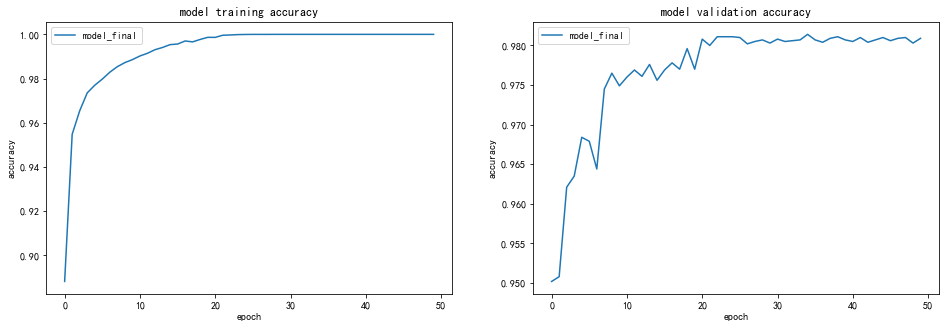

In [9]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

plt.show()

In [10]:
max_acc = max(model_history.history["acc"])
max_index = model_history.history["acc"].index(max_acc)
max_valacc = max(model_history.history["val_acc"])
max_valindex = model_history.history["val_acc"].index(max_valacc)
print(f'最高training accuracy： {max_acc}\n發生在epoch = {max_index}')
print(f'最高validation accuracy： {max_valacc}\n發生在epoch = {max_valindex}')

最高training accuracy： 0.9999833333333333
發生在epoch = 28
最高validation accuracy： 0.9814
發生在epoch = 34


In [11]:
score = model.evaluate(x_test_norm, y_test, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

10000/10000 [==============================] - 0s 9us/step
Loss: 0.102212
準確率: 98.089999


此設計model大約可達到98%之正確率！